In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__3/S_3__I_114800.csv",parse_dates=['date'],index_col='date')

In [2]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
k=int(len(df)*0.8)
train_data = df.iloc[:k]
test_data = df.iloc[k:]

In [3]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = len(test_data) # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['unit_sales']).fit(smoothing_level=alpha)
test_predictions = model.forecast(len(test_data)).rename('SES Forecast')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


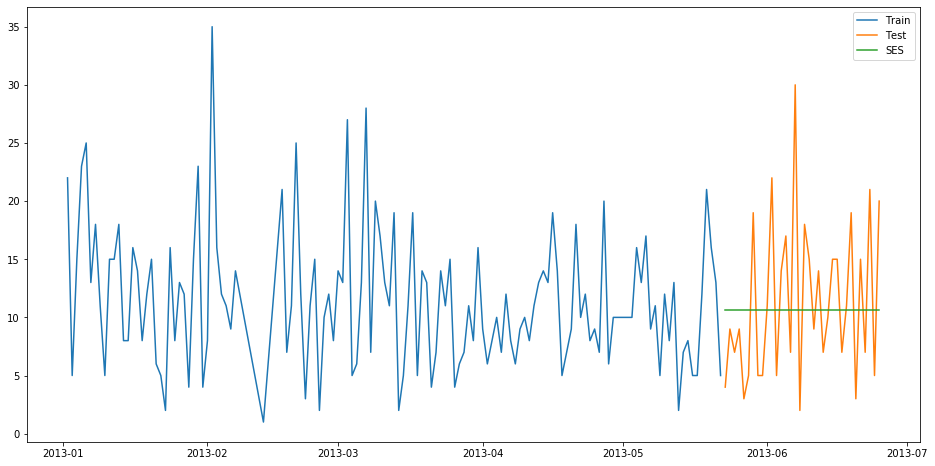

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test_data.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_data['unit_sales'])).fit(smoothing_level=0.2,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test_data))
plt.figure(figsize=(16,8))
plt.plot(train_data['unit_sales'], label='Train')
plt.plot(test_data['unit_sales'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()



In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
rms = sqrt(mean_squared_error(test_data.unit_sales, y_hat_avg.SES))
print(rms)

6.645971832413442


In [88]:
k=int(len(df)*0.6)
train_data = df.iloc[:k]
test_data = df.iloc[k:]

In [8]:
rms_error = np.sqrt(mean_squared_error(test_data['unit_sales'],test_predictions))
print("RMS Error is ",rms_error)

RMS Error is  6.674287799157322


In [ ]:
model = SimpleExpSmoothing(np.asarray(train['data']))
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
pred1 = fit1.forecast(9)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

In [10]:
model = SimpleExpSmoothing(np.asarray(train_data['unit_sales']))
model._index = pd.to_datetime(train_data.index)

In [89]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(train_data)
model._index = train_data.index
model_fit = model.fit(smoothing_level=.3)
# make prediction
yhat = model_fit.predict(k,len(df)-1)
print(yhat)

2015-11-04    10.852424
2015-11-05    10.852424
2015-11-06    10.852424
2015-11-07    10.852424
2015-11-08    10.852424
                ...    
2017-08-31    10.852424
2017-09-01    10.852424
2017-09-02    10.852424
2017-09-03    10.852424
2017-09-04    10.852424
Freq: D, Length: 671, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [90]:
np.sqrt(mean_squared_error(test_data['unit_sales'],yhat))

5.7036789579042315

In [74]:
test_data['predicted']=np.array(yhat)

In [75]:
test_data.head()

,unit_sales,predicted
date,,
2016-03-28,8.073,7.635998
2016-03-29,14.401,7.635998
2016-03-30,7.739,7.635998
2016-03-31,12.881,7.635998
2016-01-04,26.933,7.635998


In [91]:
forecast1=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/TS_FORECAST_60%.csv")

In [92]:
forecast1['SES']=np.array(yhat)

In [93]:
forecast1.to_csv('TS_FORECAST_60%.csv')

In [184]:
rms = np.sqrt(mean_squared_error(test.unit_sales, pred))
print(rms)


6.536018773163366


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STEST/S_1__I_582865.csv",parse_dates=['date'],index_col='date')

In [95]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)

In [96]:
len(test_data)

671

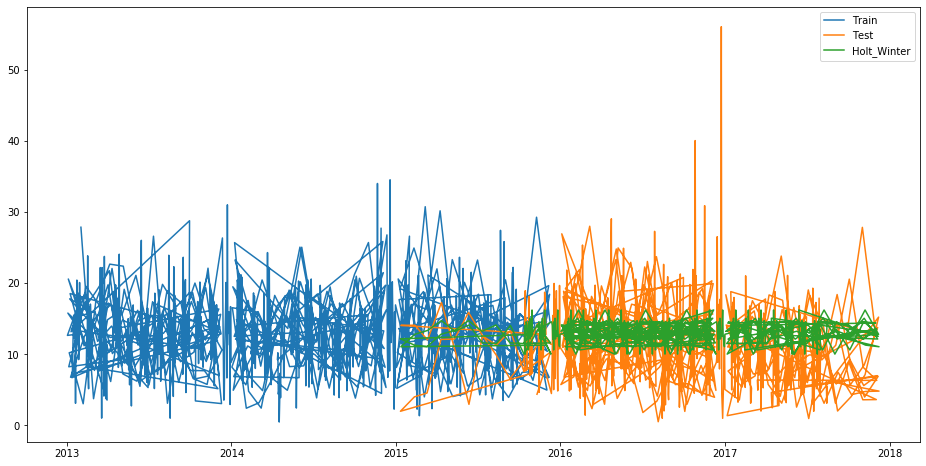

In [97]:
y_hat_avg = test_data.copy()
fit1 = ExponentialSmoothing(np.asarray(train_data['unit_sales']) ,seasonal_periods=28,damped=False, seasonal='add').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
y_hat_avg['Holt_Winter']=fit1.predict(k,len(df)-1)
plt.figure(figsize=(16,8))
plt.plot( train_data['unit_sales'], label='Train')
plt.plot(test_data['unit_sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [55]:
y_hat_avg['Holt_Winter']

date
2015-11-10    16.849378
2015-12-10    11.609182
2015-10-13    11.301942
2015-10-14    12.555733
2015-10-15    11.736528
                ...    
2017-11-08    11.791340
2017-12-08    14.679366
2017-08-13    14.985785
2017-08-14    10.605344
2017-08-15    14.727553
Name: Holt_Winter, Length: 671, dtype: float64

In [60]:
test_data['predicted']=y_hat_avg['Holt_Winter']

In [61]:
test_data.tail()

,unit_sales,predicted
date,,
2017-11-08,4.777,11.288412
2017-12-08,4.826,11.062747
2017-08-13,6.288,12.815001
2017-08-14,3.124,13.344675
2017-08-15,5.412,14.726091


In [98]:
forecast1['Holt_Winter']=np.array(y_hat_avg['Holt_Winter'])

In [99]:
forecast1.to_csv('TS_FORECAST_60%.csv')

In [100]:
forecast1

,Unnamed: 0,date,actual_value,arima,Prophet,Sarima,SES,Holt_Winter
0,0,2015-11-10,4.386,9.286938,11.027575,13.053703,10.852424,14.113855
1,1,2015-12-10,10.317,12.393542,13.712123,12.912117,10.852424,11.606816
2,2,2015-10-13,7.598,13.328851,13.136254,12.915222,10.852424,11.510771
3,3,2015-10-14,15.872,14.079578,7.958804,12.915154,10.852424,14.062201
4,4,2015-10-15,18.938,13.242960,11.904004,12.915155,10.852424,10.028837
...,...,...,...,...,...,...,...,...
666,666,2017-11-08,4.777,13.003766,13.514572,12.915155,10.852424,11.288412
667,667,2017-12-08,4.826,13.007185,12.947000,12.915155,10.852424,11.062747
668,668,2017-08-13,6.288,13.009964,7.844142,12.915155,10.852424,12.815001
669,669,2017-08-14,3.124,13.006864,11.732503,12.915155,10.852424,13.344675


In [63]:
test_data.to_csv('Holt_winter_Forecast_Value.csv')

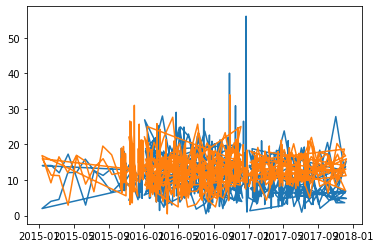

In [43]:
plt.plot(test_data['unit_sales'], label='av')
plt.plot(test_data['predicted'], label='format')

In [59]:
rms = sqrt(mean_squared_error(test_data.unit_sales, y_hat_avg.Holt_Winter))
print(rms)

6.299789671860453


In [108]:

from statsmodels.tsa.statespace.varmax import VARMAX
model = VARMAX(list(train_data['unit_sales']), order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast()

IndexError: tuple index out of range

In [174]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(train_data['unit_sales'], order=(1, 1, 1),seasonal_order=(0, 0, 0, 12), enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)
# make prediction
yhat= model_fit.predict(k,len(df)-1)

In [185]:
np.sqrt(mean_squared_error(test_data.unit_sales, yhat))

6.643069032845645

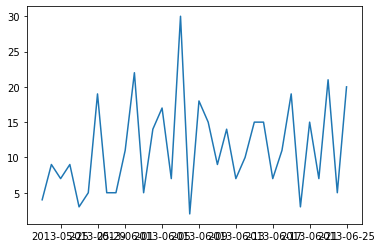

In [176]:
plt.plot(test_data['unit_sales'], label='Test')

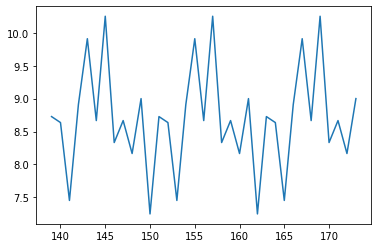

In [177]:
plt.plot(pred, label='Test')

In [189]:
error = pd.DataFrame(columns=['File_name','RMSE_ERROR_CNN','RMSE_ERROR_LSTM','RMSE_ERROR_ARIMA','RMSE_ERROR_SES','RMSE_ERROR_HOLT_WINTER','RMSE_ERROR_SARIMA','SES_MSE','HW_MSE','SARIMA_MSE','SES_MAPE','SARIMA_MAPE','HW_MAPE'])

In [190]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [187]:
dff=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/Forecast_Error_CNN.csv")

In [191]:
import os
import logging, sys
logging.disable(sys.maxsize)
from math import sqrt
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__1']
x=0
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
        if  any(dff.File_name ==""+csv_file)==True:
       #if len(df.index)>=100:
            select_indices=list(np.where(dff["File_name"] == ''+csv_file)[0])
            print(select_indices)
            df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__1/"+csv_file,parse_dates=['date'],index_col='date')
            df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
            #SES
            k=int(len(df)*0.8)
            train_data = df.iloc[:k]
            test_data = df.iloc[k:]
            span = len(test_data)
            alpha = 2/(span+1)
            model = SimpleExpSmoothing(train_data['unit_sales']).fit(smoothing_level=alpha)
            test_predictions = model.forecast(len(test_data)).rename('SES Forecast')
            
            rmse =np.sqrt(mean_squared_error(test_data['unit_sales'],test_predictions))
            error.loc[x, ['File_name']]=csv_file
            error.loc[x, ['RMSE_ERROR_SES']]=rmse
            error.loc[x, ['SES_MSE']]=mean_squared_error(test_data['unit_sales'],test_predictions)
            error.loc[x, ['SES_MAPE']]=mean_absolute_percentage_error(test_data['unit_sales'],test_predictions)
            #------------------------------
            #HOLT_WINTERS
            y_hat_avg = test_data.copy()
            fit1 = ExponentialSmoothing(np.asarray(train_data['unit_sales']) ,seasonal_periods=7,trend='add', seasonal='add',).fit()
            y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
            rmse =np.sqrt(mean_squared_error(test_data.unit_sales, y_hat_avg.Holt_Winter))
            #error.loc[x, ['File_name']]=csv_file
            error.loc[x, ['RMSE_ERROR_HOLT_WINTER']]=rmse
            error.loc[x, ['HW_MSE']]=mean_squared_error(test_data.unit_sales, y_hat_avg.Holt_Winter)
            error.loc[x, ['HW_MAPE']]=mean_absolute_percentage_error(test_data.unit_sales, y_hat_avg.Holt_Winter)
            #-----------------
            #SARIMA
            model = SARIMAX(train_data['unit_sales'], order=(1, 1, 1),seasonal_order=(0, 0, 0, 12), enforce_stationarity=False,enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            # make prediction
            yhat= model_fit.predict(k,len(df)-1)
            rmse =np.sqrt(mean_squared_error(test_data.unit_sales, yhat))
            #error.loc[x, ['File_name']]=csv_file
            error.loc[x, ['RMSE_ERROR_SARIMA']]=rmse
            error.loc[x, ['SARIMA_MSE']]=mean_squared_error(test_data.unit_sales, yhat)
            error.loc[x, ['SARIMA_MAPE']]=mean_absolute_percentage_error(test_data.unit_sales, yhat)
            
            #
            if len(select_indices)==1:
                b=dff.iloc[select_indices[0]]['RMSE_ERROR_LSTM']
                d=dff.iloc[select_indices[0]]['RMSE_ERROR_ARIMA']
                c=dff.iloc[select_indices[0]]['RMSE_ERROR_CNN']
                error.loc[x, ['RMSE_ERROR_LSTM']]=b
                error.loc[x, ['RMSE_ERROR_ARIMA']]=d
                error.loc[x, ['RMSE_ERROR_CNN']]=c
            
            x=x+1
            print(x)

[0]
1
[1]
2
[2]
3
[3]
4
[4]
5
[5]
6
[6]
7
[7]
8
[8]
9
[9]
10
[10]
11
[11]
12
[12]
13
[13]
14
[14]
15
[15]
16
[16]
17
[17]
18
[18]
19
[19]
20
[20]
21
[21]
22
[22]
23
[23]
24
[24]
25
[25]
26
[26]
27
[27]
28
[28]
29
[29]
30
[30]
31
[31]
32
[32]
33
[33]
34
[34]
35
[35]
36
[36]
37
[37]
38
[38]
39
[39]
40
[40]
41
[41]
42
[42]
43
[43]
44
[44]
45
[45]
46
[46]
47
[47]
48
[48]
49
[49]
50
[50]
51
[51]
52
[52]
53
[53]
54
[54]
55
[55]
56
[56]
57
[57]
58
[58]
59
[59]
60
[60]
61
[61]
62
[62]
63
[63]
64
[64]
65
[65]
66
[66]
67
[67]
68
[68]
69
[69]
70
[70]
71
[71]
72
[72]
73
[73]
74
[74]
75
[75]
76
[76]
77
[77]
78
[78]
79
[79]
80
[80]
81
[81]
82
[82]
83
[83]
84
[84]
85
[85]
86
[86]
87
[87]
88
[88]
89
[89]
90
[90]
91
[91]
92
[92]
93
[93]
94
[94]
95
[95]
96
[96]
97
[97]
98
[98]
99
[99]
100


In [194]:
len(error)

100

In [195]:
error.to_csv('SES+SARIMA+HOLT_W_Forecasting_Error.csv')